<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/cipfa_and_hips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Установочные команды

In [0]:
!pip install tokenization
!pip install nltk
!pip install pymorphy2

Импорты и используемые функции

In [46]:
from google.colab import drive
import re
import tokenization
import nltk
from nltk import sent_tokenize, word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
import pymorphy2
import matplotlib.pyplot as plt
import os
drive.mount('/content/drive')

def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]

def get_normalize_text(text):
    text=text.lower()
    words=re.findall(r"[\w']+|[.,!?;:{}() \n]",text)
    words=normalize_tokens(words)
    words=[t for t in words if len(t)>2]
    return words

def uniq_dic(words):
    vocab={}
    for word in words:
      vocab[word]=vocab.get(word,0)+1
    return vocab
  
def hips(n,k=100,b=0.6):
  return k*(n**b)
def sort_text(text):
  return len(text)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***ГРАФИЧКИ***



> [Закон ЦИПФА](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0)

Зако́н Ци́пфа («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n




Text(0, 0.5, 'Frequency')

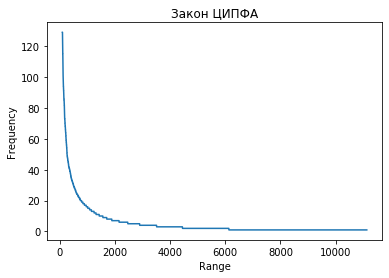

In [48]:
s=open('/content/drive/My Drive/Colab Notebooks/тексты/35000Толстой Лев. Война и мир. Том 3 - royallib.ru.txt','r')
text=s.read()
s.close()
words=get_normalize_text(text)
vocab=uniq_dic(words)
# print(*sorted(sorted(vocab), key=lambda x :vocab.get(x),reverse=False), sep ='\n')
list_id=list(vocab.items())
list_id.sort(key=lambda i :i[1],reverse=True)
id=[t[1] for t in list_id]

plt.plot(range(100,len(id)),id[100:])
plt.title("Закон ЦИПФА")
plt.xlabel("Range")
plt.ylabel("Frequency")



> [Закон ХИПСА](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A5%D0%B8%D0%BF%D1%81%D0%B0)

 Зако́н Хи́пса — эмпирическая закономерность в лингвистике, описывающая распределение числа разных слов в документе (или наборе документов) как функцию от его длины. Описывается формулой


![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1313c9e5fa70c479a9b34dc84d396e7d183dc48f)

где VR — число разных слов в тексте размера n. K и β — свободные параметры, определяются эмпирически. Для английского корпуса текстов, K обычно лежит между 10 и 100, а β между 0.4 и 0.6.


Text(0, 0.5, 'count of uniqueness words')

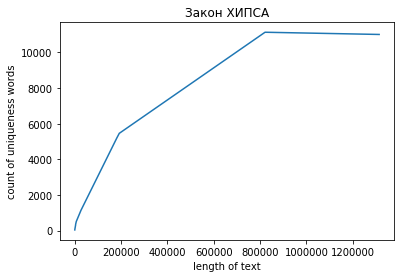

In [47]:

texts=[]
directory='/content/drive/My Drive/Colab Notebooks/тексты/'
files = os.listdir(directory)
for file in files:
  s=open(directory+file,'r')
  texts.append(s.read())
  s.close
texts.sort(key=sort_text)
f=[len(uniq_dic(get_normalize_text(r))) for r in texts]
len_text=[len(t) for t in texts]
plt.plot(len_text,f)
plt.title("Закон ХИПСА")
plt.xlabel("length of text")
plt.ylabel("count of uniqueness words")